<a href="https://colab.research.google.com/github/honeylouluzon/Data-Analysis/blob/main/Lean_Six_Sigma_%5BMeasurement_Phase%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. DATASET

Choose 1 option only

##[OPTION#1] Random Dataset Generator

###1. Set needed values

In [ ]:
#Set the number of records.
lenValue=50
#minValue is the lowest value in the dataset
#maxValue is the higest value in the dataset
#Set the [Column Name, minValue, maxValue]
colInfo=[["Delivery Time",13,16]
         , ["Sample Size", 102,148]
         , ["Defective Units", 10,15]]





###2. Generate the data

In [ ]:
import random
datalist=[[] for _ in range(len(colInfo))]
for i in range(lenValue):
  colName=[row[0] for row in colInfo]
  for j in range(len(colName)):
    datalist[j].append(random.randint(colInfo[j][1],colInfo[j][2]))





###3. Load to dataframe

In [ ]:
import pandas as pd
data=pd.DataFrame()
for index, name in enumerate(colName):
  data[name]= pd.DataFrame(datalist[index][:])





###4. Data Manipulation

####4.1. Set the value to add more or remove

In [ ]:
#Set the value to add or remove
uLenValue=10
uColInfo=[["Delivery Time", 17,20],
          ["Sample Size", 160, 180],
          ["Defective Units", 80, 100]]




####4.2. Add more rows

In [ ]:
import random
lenValue+=uLenValue
for i in range(uLenValue):
  uColName=[row[0] for row in uColInfo]
  temp={}
  for k,j in enumerate(uColName):
    new_data=random.randint(uColInfo[k][1],uColInfo[k][2])
    temp[j]=new_data
  data.loc[len(data)]=temp


####4.3. Remove the record

In [ ]:
#the record to delete is the most recent or last {uLenValue} rows
lenValue-=uLenValue
for i in range(uLenValue):
  try:
    data.drop(index=data.index[-1], inplace= True)
  except IndexError:
    print("Record not found!")


###5. View the data

####5.1.A Set the number of record to view

In [ ]:
#Set the number of record to view
numRecord=10

####5.1.B View partial record

In [ ]:
data.head(numRecord)

,Delivery Time,Sample Size,Defective Units
0,15,115,12
1,13,142,12
2,14,143,11
3,13,122,10
4,15,127,14
5,16,103,14
6,15,146,14
7,15,128,15
8,15,109,15
9,16,111,10


####5.2 View all record

In [ ]:
data

,Delivery Time,Sample Size,Defective Units
0,16,137,14
1,14,148,12
2,14,111,10
3,15,124,11
4,13,138,10
5,14,132,15
6,15,110,12
7,15,114,11
8,14,145,11
9,15,111,14


##[OPTION#2] Load from File

###1. Set the File Path

In [ ]:
filePath='/content/sample_data/mnist_test.csv'

###2. Load to dataframe

In [ ]:
data=pd.read_csv(filePath)

#[M] 2. CONTROL CHART

##[Set#1] Variable Chart for the Individual

###1. Set the column to use in the Control Chart

In [ ]:
#View the list of columns
for index, name in enumerate(data.columns.tolist()):
  print(f"{index}. {name}")

0. Delivery Time
1. Sample Size
2. Defective Units


In [ ]:
#Set the index number of the record to use
#Run the code in previous cell to see the equivalent index
indexData=0

###2. Generate Variable Chart for the Individual

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
<ipython-input-11-24167a9618bf>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(observation[-1]+7,ucl-0.1, f"UCL: {round(ucl[0],2)}")
<ipython-input-11-24167a9618bf>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(observation[-1]+7,lcl-0.1, f"LCL: {rou

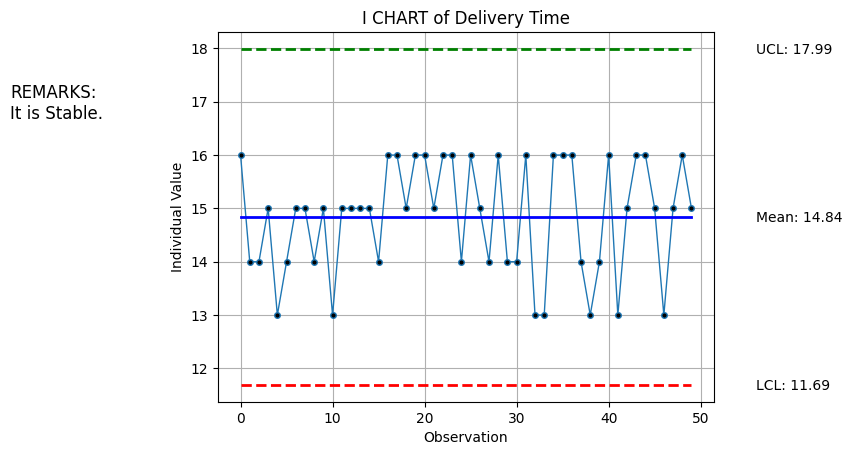

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Set and label the coordinates
value = data.iloc[:,[indexData]]
observation = data.index
plt.xlabel ('Observation')
plt.ylabel ('Individual Value')
plt.title ("I CHART of " + value.columns[0])

#Calculate
meanValue = round(np.mean(value),2)
stdValue = round(np.std(value),2)
ucl = meanValue + (stdValue * 3)
lcl = meanValue - (stdValue * 3)

#Plot the datapoints
plt.plot(value, '-o', linewidth=1, markersize=4, markerfacecolor='black') #alpha=0.25
plt.plot([meanValue]*len(observation), linewidth=2, color='blue')
plt.plot([ucl]*len(observation), '--', linewidth=2, color='green')
plt.plot([lcl]*len(observation), '--', linewidth=2, color='red')

#Lines Label
plt.text(observation[-1]+7,meanValue-0.1, f"Mean: {meanValue}")
plt.text(observation[-1]+7,ucl-0.1, f"UCL: {round(ucl[0],2)}")
plt.text(observation[-1]+7,lcl-0.1, f"LCL: {round(lcl[0],2)}")

#Generate Remarks
remarks="REMARKS:\n"
outlier=[]
outlierCount=0
for i in value["Delivery Time"]:
  if float(i) > float(ucl[0]) or float(i) < float(lcl[0]):
    outlier.append(i)
    outlierCount+=1
if outlierCount == 0:
  remarks+="It is Stable."
elif outlierCount < (lenValue*0.04):
  remarks+="A little unstable"
  remarks+=f"\nwith {outlierCount} outlier."
else:
  remarks+="It is unstable"
  remarks+=f"\nwith {round(outlierCount/lenValue*100,2)}% outlier."
plt.figtext(-0.2,0.7, remarks, fontsize=12, color='black')
plt.grid(True)

plt.show()

###3. Export Result

In [ ]:
plt.savefig('I_Chart_of_'+value.columns[0]+'.png')

<Figure size 640x480 with 0 Axes>

##[Set#2] Attribute Chart (P...)

###1. Set the column to use in the Control Chart

In [ ]:
#View the list of columns
for index, name in enumerate(data.columns.tolist()):
  print(f"{index}. {name}")

0. Delivery Time
1. Sample Size
2. Defective Units


In [ ]:
#Set the index number of the record to use
#Run the code in the previous cell to see the equivalent index
indexData=2 #Defective
indexSS= 1 #Sample Size

###2. Generate the P-Chart

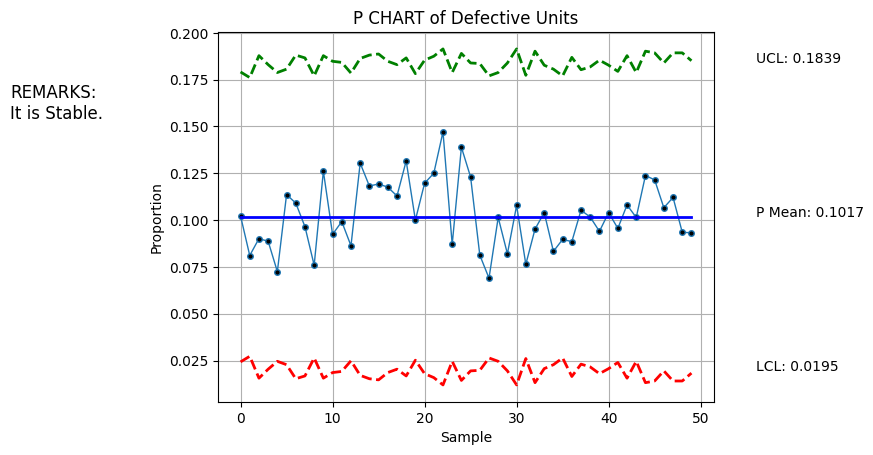

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Calculate record
value=data.iloc[:,[indexData]]
subgroup=data.iloc[:,[indexSS]]
prop=[]
stdprop=[]
ucl=[]
lcl=[]
meanprop=round((np.sum(value.iloc[:,0])/np.sum(subgroup.iloc[:,0])),4)

for i in range(len(value)):
  p=(round(float(value.iloc[i,0])/(subgroup.iloc[i,0]),4))
  sp=round(np.sqrt((meanprop*(1-meanprop))/subgroup.iloc[i,0]),4)
  prop.append(p)
  stdprop.append(sp)
  ucl.append(meanprop+(3*sp))
  lcl.append(meanprop-(3*sp))
uclmean=round(np.mean(ucl),4)
lclmean=round(np.mean(lcl),4)

#print(stdprop)
#Set record
record = pd.DataFrame()
record['Defective'] = pd.DataFrame(value)
record['Sample Size'] = pd.DataFrame(subgroup)
record['Proportion'] = pd.DataFrame(prop)
record['Standard Deviation'] = pd.DataFrame(stdprop)
record['UCL'] = pd.DataFrame(ucl)
record['LCL'] = pd.DataFrame(lcl)

sample = record.index

#Set label
plt.xlabel ('Sample')
plt.ylabel ('Proportion')
plt.title ("P CHART of " + value.columns[0])

#Plot the datapoints
plt.plot(record['Proportion'], '-o', linewidth=1, markersize=4, markerfacecolor='black') #alpha=0.25
plt.plot([meanprop]*len(sample), linewidth=2, color='blue')
plt.plot(record['UCL'], '--', linewidth=2, color='green')
plt.plot(record['LCL'], '--', linewidth=2, color='red')

#Lines Label
plt.text(sample[-1]+7,meanprop, f"P Mean: {meanprop}")
plt.text(sample[-1]+7,uclmean, f"UCL: {uclmean}")
plt.text(sample[-1]+7,lclmean, f"LCL: {lclmean}")

#Generate Remarks
remarks="REMARKS:\n"
outlier=[]
outlierCount=0
for i, row in record.iterrows():
  if float(row['Proportion']) > float(row['UCL']) or float(row['Proportion']) < float(row['LCL']):
    outlier.append(row['Proportion'])
    outlierCount+=1
if outlierCount == 0:
  remarks+="It is Stable."
elif outlierCount < (lenValue*0.05):
  remarks+="A little unstable"
  remarks+=f"\nwith {outlierCount} outlier."
else:
  remarks+="It is unstable"
  remarks+=f"\nwith {round(outlierCount/lenValue*100,2)}% outlier."

plt.figtext(-0.2,0.7, remarks, fontsize=12, color='black')
plt.grid(True)
plt.show()

###3. Export Result

In [ ]:
plt.savefig('P_Chart_of_'+value.columns[0]+'.png')

<Figure size 640x480 with 0 Axes>

#[M] 3. CAPABILITY ANALYSIS

##[Set#1] Normal Distribution

###1. Set needed info

In [ ]:
#View the list of columns
for index, name in enumerate(data.columns.tolist()):
  print(f"{index}. {name}")


0. Delivery Time
1. Sample Size
2. Defective Units


In [ ]:
#Set the index number of the record to use
#Run the code in previous cell to see the equivalent index
indexData=0
#Set the desired value
lb=0
usl=10
target=''

###2. Generate the Normal Distribution

<ipython-input-19-0509b21a32d5>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s+=f"\nMean: {meanValue}\nStDev: {stdValue[0]}"
<ipython-input-19-0509b21a32d5>:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s+=f"\nZ.LB: {int(zScoreLB)}"
<ipython-input-19-0509b21a32d5>:44: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s+=f"\nZ.USL: {int(zScoreUSL)}"


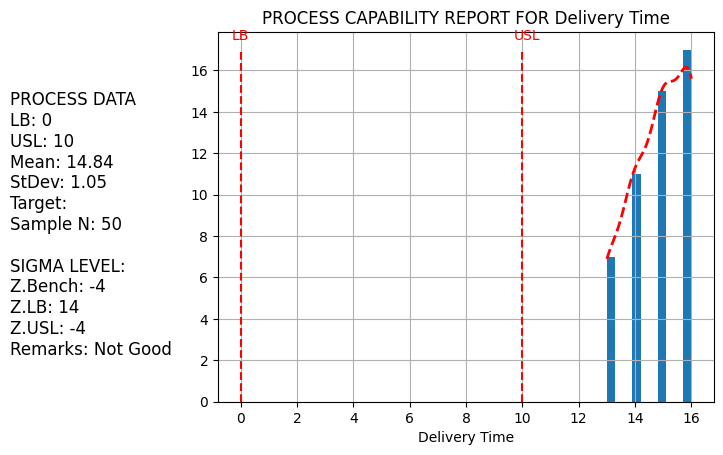

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gaussian_kde


#Set and label the coordinates
value = data.iloc[:,[indexData]]
valueNpm = data.iloc[:,indexData].values
observation = data.index
plt.xlabel (value.columns[0])
#plt.ylabel ('Value')
plt.title ("PROCESS CAPABILITY REPORT FOR "+value.columns[0])

#Calculate
modeValue = value.mode()
countMode = (value.iloc[:,0]==modeValue.iloc[0,0]).sum()
kde=gaussian_kde(valueNpm)

x = np.linspace(np.min(value), np.max(value), 100);
y = kde(x) #norm.pdf(x, meanValue, stdValue);
y_scaled = y * (countMode/np.max(y)) * .95

#Sigma Score
zScore = np.min([((usl-meanValue)/stdValue),((meanValue-lb)/stdValue)])
zScoreLB = (meanValue-lb)/stdValue
zScoreUSL = (usl-meanValue)/stdValue
sigmaRemarks=""
if zScore < 4: sigmaRemarks="Not Good"
elif zScore<6: sigmaRemarks="Acceptable"
else: sigmaRemarks="Good"

#plot the datapoints
plt.hist(value, rwidth=10)
plt.vlines(lb, ymin=0, ymax=countMode, linestyles='dashed', colors='red')
plt.vlines(usl, ymin=0, ymax=countMode, linestyles='dashed', colors='red')
plt.plot(x, y_scaled, '--', linewidth=2, color='red');

#labels
s=f"PROCESS DATA\nLB: {lb}\nUSL: {usl}"
s+=f"\nMean: {meanValue}\nStDev: {stdValue[0]}"
s+=f"\nTarget: {target}\nSample N: {lenValue}"
s+=f"\n\nSIGMA LEVEL:\nZ.Bench: {int(zScore)}"
s+=f"\nZ.LB: {int(zScoreLB)}"
s+=f"\nZ.USL: {int(zScoreUSL)}"
s+=f"\nRemarks: {sigmaRemarks}"

plt.figtext(-0.2,0.2, s, fontsize=12, color='black', ha='left', va='bottom', bbox=None)
plt.text(lb-0.3,countMode+0.5, 'LB', color='red')
plt.text(usl-0.3,countMode+0.5, 'USL', color='red')
plt.grid(True)

plt.show()

###3. Export Result

In [ ]:
plt.savefig('ProcessCapabilityReportFor'+value.columns[0]+'.png')

<Figure size 640x480 with 0 Axes>

##[Set#2] Binomial Distribution

###1. Set needed info

In [ ]:
#View the list of columns
for index, name in enumerate(record.columns.tolist()):
  print(f"{index}. {name}")

0. Defective
1. Sample Size
2. Proportion
3. Standard Deviation
4. UCL
5. LCL


In [ ]:
#Set the index number of the record to use
#Run the code in the previous cell to see the equivalent index
indexDef=0 #Defective
indexProf=2 #Sample Size

#Set the target maximum %Defective
target=5

###2. Generate the Binomial Distribution

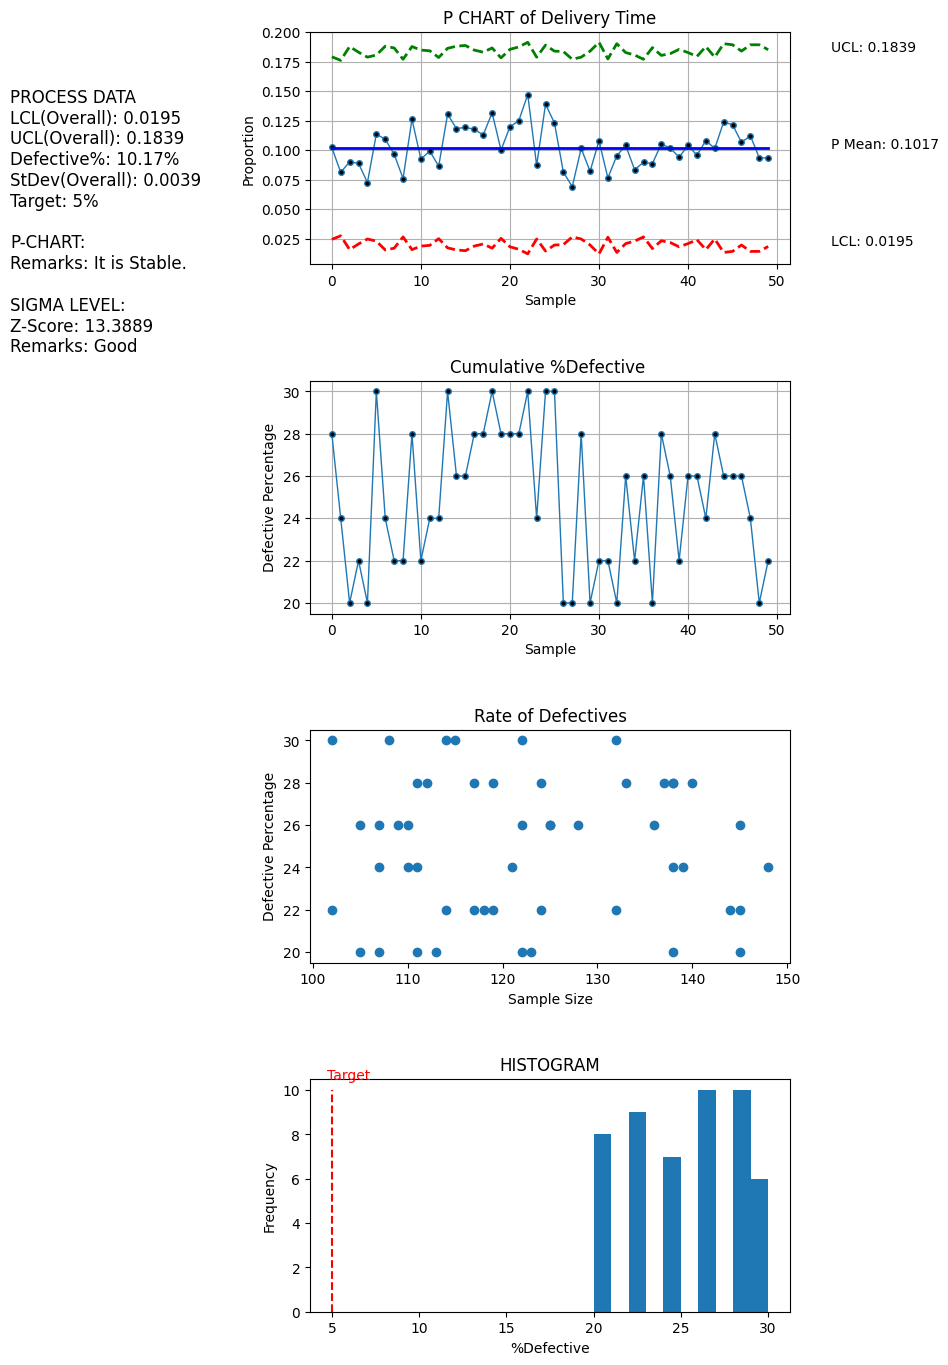

In [ ]:
f, (plt1, plt2, plt3, plt4) = plt.subplots(4, 1, figsize=(6,16))

########P-CHART########
#Set label
plt1.set_xlabel('Sample')
plt1.set_ylabel('Proportion')
plt1.title.set_text("P CHART of " + value.columns[0])

#Plot the datapoints
plt1.plot(record['Proportion'], '-o', linewidth=1, markersize=4, markerfacecolor='black') #alpha=0.25
plt1.plot([meanprop]*len(sample), linewidth=2, color='blue')
plt1.plot(record['UCL'], '--', linewidth=2, color='green')
plt1.plot(record['LCL'], '--', linewidth=2, color='red')

#Lines Label
plt1.text(sample[-1]+7,meanprop, f"P Mean: {meanprop}")
plt1.text(sample[-1]+7,uclmean, f"UCL: {uclmean}")
plt1.text(sample[-1]+7,lclmean, f"LCL: {lclmean}")

#Generate Remarks
remarks="REMARKS:\n"
outlier=[]
outlierCount=0
for i, row in record.iterrows():
  if float(row['Proportion']) > float(row['UCL']) or float(row['Proportion']) < float(row['LCL']):
    outlier.append(row['Proportion'])
    outlierCount+=1

if outlierCount == 0:
  remarks+="It is Stable."
elif outlierCount < (lenValue*0.05):
  remarks+="A little unstable"
  remarks+=f"\nwith {outlierCount} outlier."
else:
  remarks+="It is unstable"
  remarks+=f"\nwith {round(outlierCount/lenValue*100,2)}% outlier."

plt1.grid(True)


########CUMULATIVE########
#Calculate record
#value=record.iloc[:,[indexData]]
#np.sum(subgroup.iloc[:,0])
defPercent=[]
sample=record.index
for i in range(len(sample)):
  dp=(round(float(record.iloc[i,indexDef])/(len(sample))*100,1))
  defPercent.append(dp)

#Set record
#record = ['Defective', 'Sample Size', 'Proportion'
#'Standard Deviation', 'UCL', 'LCL']
record['Defective Percentage'] = pd.DataFrame(defPercent)

#Set label
plt2.set_xlabel ('Sample')
plt2.set_ylabel ('Defective Percentage')
plt2.set_title ("Cumulative %Defective ")

#Plot the datapoints
plt2.plot(sample, record['Defective Percentage'], '-o', linewidth=1, markersize=4, markerfacecolor='black') #alpha=0.25
plt2.grid(True)


########RATE OF DEFECTIVES########
#Set label
plt3.set_xlabel ('Sample Size')
plt3.set_ylabel ('Defective Percentage')
plt3.set_title ("Rate of Defectives")

#Plot the datapoints
plt3.scatter(record['Sample Size'], record['Defective Percentage'])



########HISTOGRAM########
#Calculate
modeDefPer=record['Defective Percentage'].mode()[0]
countModeDefPer=(record['Defective Percentage']==modeDefPer).sum()

#Set label
plt4.set_xlabel('%Defective')
plt4.set_ylabel ('Frequency')
plt4.set_title ("HISTOGRAM")
plt4.text((target)-((target)*0.05),countModeDefPer+0.5, 'Target', color='red')

#Plot the datapoints
plt4.hist(record['Defective Percentage']) #alpha=0.25
plt4.vlines((target), ymin=0, ymax=countModeDefPer, linestyles='dashed', color='red')


########Compute Z-Score########
#sumDefects = np.sum(record['Defective'])
sumSampleSize = np.sum(record['Sample Size'])
stdPropAll = np.sqrt((meanprop*(1-meanprop))/sumSampleSize)
zscore = (meanprop-(target/100))/stdPropAll

#########Generate Remarks########

remarks="\n\nP-CHART:\nRemarks: "
outlier=[]
outlierCount=0
for i, row in record.iterrows():
  if float(row['Proportion']) > float(row['UCL']) or float(row['Proportion']) < float(row['LCL']):
    outlier.append(row['Proportion'])
    outlierCount+=1

if outlierCount == 0:
  remarks+="It is Stable."
elif outlierCount < (lenValue*0.05):
  remarks+="A little unstable"
  remarks+=f"\nwith {outlierCount} outlier."
else:
  remarks+="It is unstable"
  remarks+=f"\nwith {round(outlierCount/lenValue*100,2)}% outlier."

remarks2="\n\nPROCESS DATA"
remarks2+=f"\nLCL(Overall): {lclmean}"
remarks2+=f"\nUCL(Overall): {uclmean}"
remarks2+=f"\nDefective%: {round(meanprop*100,2)}%"
remarks2+=f"\nStDev(Overall): {round(stdPropAll,4)}"
remarks2+=f"\nTarget: {target}%"
remarks = remarks2 + remarks

remarks+="\n\nSIGMA LEVEL:"
remarks+=f"\nZ-Score: {round(zscore,4)}"
remarks+="\nRemarks: "
if zscore < 4: remarks+="Not Good"
elif zscore < 6: remarks+="Acceptable"
else: remarks+="Good"

#Plot the remarks
plt.figtext(-0.4,0.7, remarks, fontsize=12, color='black')


# Adjust subplot spacing
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.5, wspace=0.3)

plt.show()